In [1]:
import torch
import sys
import os.path as osp
import os
import sys
import numpy as np

sys.path.append("/afs/cern.ch/work/m/mgarciam/private/Tracking_wcoc/")
from src.dataset.dataset import SimpleIterDataset
from src.utils.train_utils import to_filelist
from torch.utils.data import DataLoader
#import dgl  # CPU only version for now
from tqdm import tqdm
from torch_scatter import scatter_sum
import matplotlib.pyplot as plt
import pickle
import numpy as np
import mplhep as hep


hep.style.use("CMS")
import matplotlib
matplotlib.rc('font', size=13)


/afs/cern.ch/work/m/mgarciam/private/miniconda/miniconda3/envs/graphgps0/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
dic_time = np.load("/afs/cern.ch/work/m/mgarciam/private/Tracking_wcoc/data_creation/condor_background_IDEA/d1.npy", allow_pickle=True).item()

(0.0, 400.0)

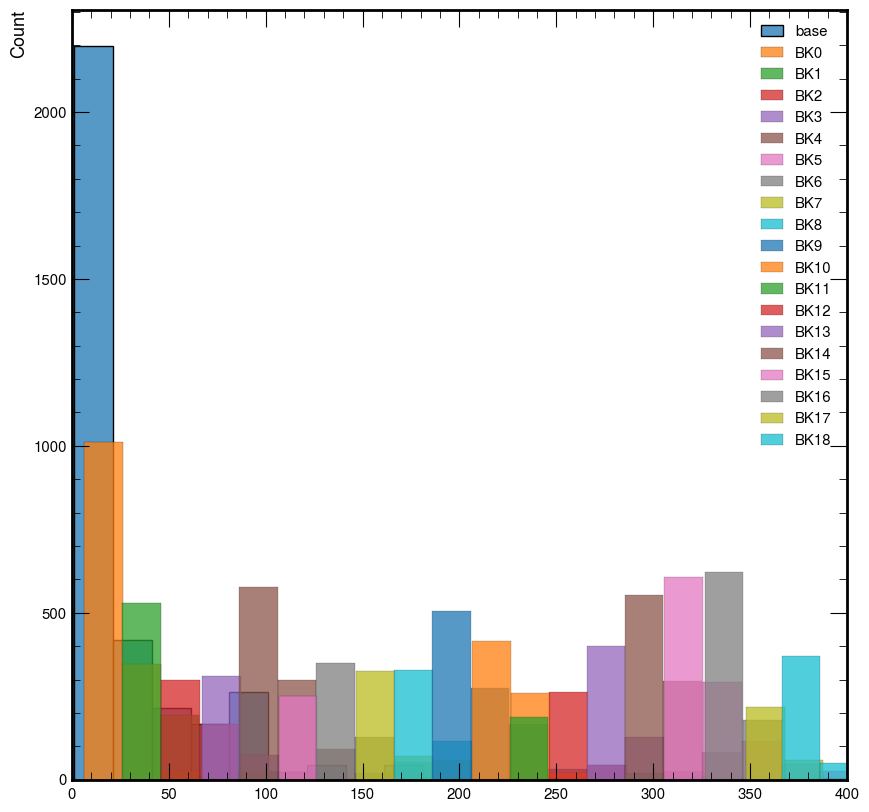

In [27]:
import seaborn as sns
plt.plot(figsize=(1,5))
sns.histplot(dic_time["base"], binwidth=20, label="base")
for i in range(0,19):
    sns.histplot(dic_time[str(i)], binwidth=20, label="BK"+str(i))
plt.legend()
plt.xlim([0,400])

In [29]:
list_all_times = []
for key in dic_time.keys():
    list_all_times.append(dic_time[key])
list_all_times = np.concatenate(list_all_times)

(0.0, 400.0)

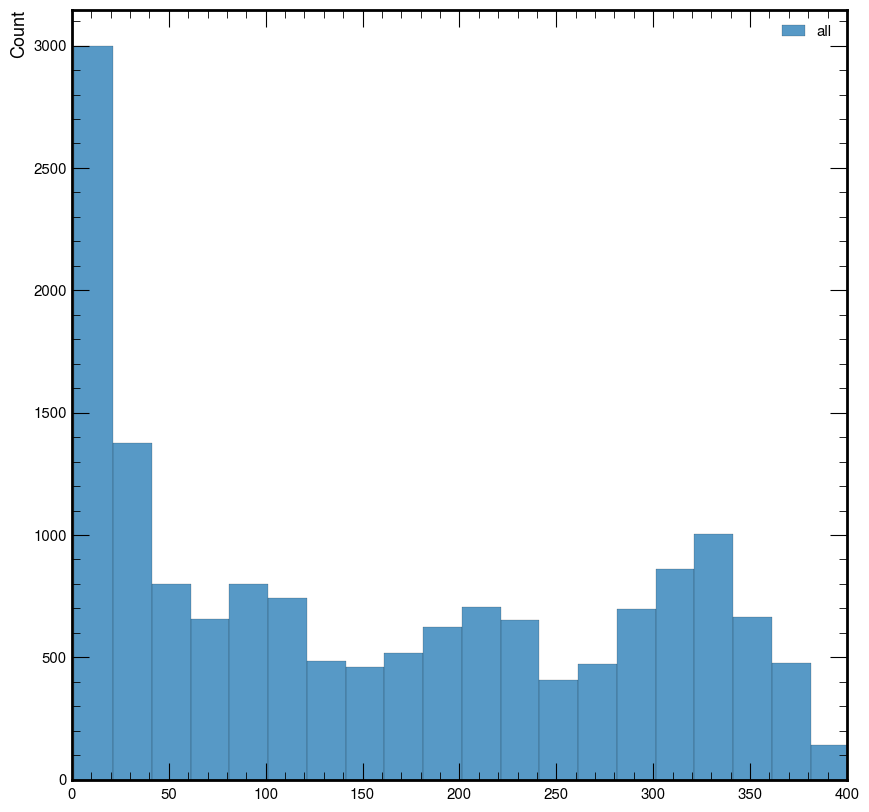

In [30]:
plt.plot(figsize=(1,5))
sns.histplot(list_all_times, binwidth=20, label="all")
plt.legend()
plt.xlim([0,400])

/eos/experiment/fcc/ee/datasets/DC_tracking/Pythia/gun_fakeCalo_g1/reco_gun_1000.root